In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, scale
import matplotlib.pyplot as plt






In [6]:
def category2(data, threshold):
    top = threshold*(max(data)-min(data))+sum(data)/len(data)
    bottom = -1*threshold*(max(data)-min(data))+sum(data)/len(data)
    print(top,bottom)
    new_data = []
    for item in data:
        if item >= top:
            new_data.append(1)
        elif item < bottom:
            new_data.append(-1)
        else:
            new_data.append(0)
    return new_data
def category(data):
    data[data>=0] = 1
    data[data<0] = -1
    return data
    
def precentage(prediction, real):
    pred = prediction -real
    pred = np.squeeze(prediction, axis=1)
    pred = category(pred)
   
    return pred
def realPrecentage(stock):
    value = pd.Series(stock['Close']-stock['Close'].shift(1), index=stock.index) 
    value = value.bfill() 
    value = np.array(value) 
    val = category(value)
   

    return val
def compare(pred, val):
    #print(pred[:1000])
    #print(val[:1000])
    t = len(pred)
    countTrue = 0
    for i in range(t):
        if pred[i] == val[i]:
            countTrue +=1
    return countTrue/t

In [2]:
AAPL = pd.read_csv('../data/transactions/Tech/AAPL.csv')  
GOOG = pd.read_csv('../data/transactions/Tech/GOOG.csv')  
FB = pd.read_csv('../data/transactions/Tech/FB.csv')  
MSFT = pd.read_csv('../data/transactions/Tech/MSFT.csv')  
AMZN = pd.read_csv('../data/transactions/Tech/AMZN.csv') 

ALK = pd.read_csv('../data/transactions/Airline/ALK.csv')  
DAL = pd.read_csv('../data/transactions/Airline/DAL.csv')  
LUV = pd.read_csv('../data/transactions/Airline/LUV.csv')  
RYAAY = pd.read_csv('../data/transactions/Airline/RYAAY.csv')  
SAVE = pd.read_csv('../data/transactions/Airline/SAVE.csv') 

JACK = pd.read_csv('../data/transactions/Fastfood/JACK.csv')  
MCD = pd.read_csv('../data/transactions/Fastfood/MCD.csv')  
TACO = pd.read_csv('../data/transactions/Fastfood/TACO.csv')  
WEN = pd.read_csv('../data/transactions/Fastfood/WEN.csv')  
YUM = pd.read_csv('../data/transactions/Fastfood/YUM.csv') 

GS = pd.read_csv('../data/transactions/Finance/GS.csv')  
JPM = pd.read_csv('../data/transactions/Finance/JPM.csv')  
MER = pd.read_csv('../data/transactions/Finance/MER-PK.csv')  
MS = pd.read_csv('../data/transactions/Finance/MS.csv')  
WFC = pd.read_csv('../data/transactions/Finance/WFC.csv') 

COST = pd.read_csv('../data/transactions/Retailer/COST.csv')  
HD = pd.read_csv('../data/transactions/Retailer/HD.csv')  
KR = pd.read_csv('../data/transactions/Retailer/KR.csv')  
TGT = pd.read_csv('../data/transactions/Retailer/TGT.csv')  
WMT = pd.read_csv('../data/transactions/Retailer/WMT.csv') 

In [11]:
def getStock(stock):
    date = pd.to_datetime(stock["Date"])

    stock = stock.drop(['Date'],axis=1)
    stock= stock.astype('float64')
    #stock['month'] = month = np.array(date.dt.month)
    #stock['day'] = month = np.array(date.dt.day)
    value = pd.Series(stock['Close']-stock['Close'].shift(1), index=stock.index) 
    value = value.bfill() 
    value = np.array(value) 
    value = category(value)
    return scale(stock), value

def processData(stock, input_unit,output_unit):
    data,result = getStock(stock)
    X,Y = [],[]
    for i in range(len(data)-input_unit-output_unit):
        X.append(data[i:(i+input_unit)])
        temp = [result[j+i+input_unit] for j in range(output_unit)]
        Y.append(temp)
    return np.array(X),np.array(Y)

X,y = processData(AAPL,10,1)
print(y)
train_size = int(X.shape[0]*0.80)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]




[[-1.]
 [-1.]
 [ 1.]
 ...
 [ 1.]
 [-1.]
 [ 1.]]


In [12]:
# basic model

model = Sequential() # most common
model.add(LSTM(256, input_shape = (10,6))) 
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse') 
callback = EarlyStopping(monitor='val_loss', patience=10,verbose=1,mode='auto')
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False,callbacks=[callback])

Train on 997 samples, validate on 250 samples
Epoch 1/300
997/997 [==============================] - 2s 2ms/step - loss: 1.0035 - val_loss: 1.0232
Epoch 2/300
997/997 [==============================] - 1s 1ms/step - loss: 1.0235 - val_loss: 1.0077
Epoch 3/300
997/997 [==============================] - 1s 1ms/step - loss: 1.0088 - val_loss: 1.0079
Epoch 4/300
997/997 [==============================] - 1s 1ms/step - loss: 1.0065 - val_loss: 1.0208
Epoch 5/300
997/997 [==============================] - 1s 1ms/step - loss: 0.9970 - val_loss: 1.0011
Epoch 6/300
997/997 [==============================] - 1s 1ms/step - loss: 0.9971 - val_loss: 1.0017
Epoch 7/300
997/997 [==============================] - 1s 1ms/step - loss: 0.9965 - val_loss: 1.0006
Epoch 8/300
997/997 [==============================] - 1s 1ms/step - loss: 0.9967 - val_loss: 1.0015
Epoch 9/300
997/997 [==============================] - 1s 1ms/step - loss: 0.9962 - val_loss: 1.0027
Epoch 10/300
997/997 [=======================

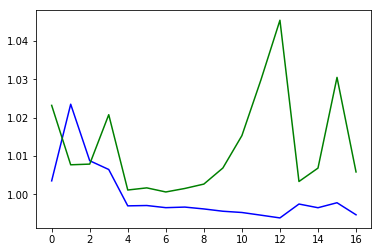

In [13]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="green")
plt.show()

In [14]:
test = WEN 

#ALK = pd.read_csv('../data/transactions/Airline/ALK.csv')  
#DAL = pd.read_csv('../data/transactions/Airline/DAL.csv')  
#LUV = pd.read_csv('../data/transactions/Airline/LUV.csv')  
#RYAAY = pd.read_csv('../data/transactions/Airline/RYAAY.csv')  
#SAVE = pd.read_csv('../data/transactions/Airline/SAVE.csv') 

#JACK = pd.read_csv('../data/transactions/Fastfood/JACK.csv')  
#MCD = pd.read_csv('../data/transactions/Fastfood/MCD.csv')  
#TACO = pd.read_csv('../data/transactions/Fastfood/TACO.csv')  
#WEN = pd.read_csv('../data/transactions/Fastfood/WEN.csv')  
#YUM = pd.read_csv('../data/transactions/Fastfood/YUM.csv') 

#GS = pd.read_csv('../data/transactions/Finance/GS.csv')  
#JPM = pd.read_csv('../data/transactions/Finance/JPM.csv')  
#MER = pd.read_csv('../data/transactions/Finance/MER-PK.csv')  
#MS = pd.read_csv('../data/transactions/Finance/MS.csv')  
#WFC = pd.read_csv('../data/transactions/Finance/WFC.csv') 

#COST = pd.read_csv('../data/transactions/Retailer/COST.csv')  
#HD = pd.read_csv('../data/transactions/Retailer/HD.csv')  
#KR = pd.read_csv('../data/transactions/Retailer/KR.csv')  
#TGT = pd.read_csv('../data/transactions/Retailer/TGT.csv')  
#WMT = pd.read_csv('../data/transactions/Retailer/WMT.csv') 

[[ 1.]
 [-1.]
 [ 1.]
 ...
 [ 1.]
 [-1.]
 [ 1.]]


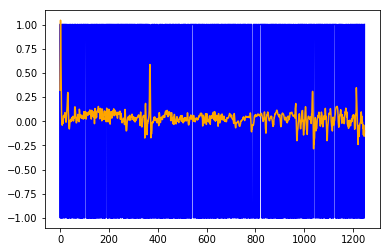

In [15]:
inputg,outputg = processData(test,10,1)
print(outputg)

prediction = model.predict(inputg)

real = outputg
plt.plot(real,color="blue")
plt.plot(prediction,color="orange")
plt.show()

#print(prediction)
#print(real)

In [284]:


pred = precentage(prediction, real)
val = realPrecentage(test)

compare(pred, val)

0.5020048115477145